In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('users_ratings.csv')
df.head(5)

,UserID,Title,Year,Description,Directors,Stars,Viewer_Advisory,Duration,Genre,Votes,Movie_Rating,User_Rating
0,ur117926588,A Nightmare on Elm Street 2: Freddy's Revenge,1985,A teenage boy is haunted in his dreams by dece...,['Jack Sholder'],"['Robert Englund', 'Mark Patton', 'Kim Myers',...",R,1 hr 27 min,Horror,72454.0,5.4,5
1,ur117926588,Elvis,2022,The life of American music icon,['Baz Luhrmann'],"['Tom Hanks', 'Austin Butler', 'Olivia DeJonge...",PG-13,2 hr 39 min,"Biography, Drama, Music",196677.0,7.3,8
2,ur117926588,Where Eagles Dare,1968,Allied agents stage a daring raid on a castle ...,['Brian G. Hutton'],"['Richard Burton', 'Clint Eastwood', 'Mary Ure...",M,2 hr 38 min,"Action, Adventure, War",59856.0,7.6,9
3,ur117926588,A Nightmare on Elm Street,1984,Teenager Nancy Thompson must uncover the dark ...,['Wes Craven'],"['Heather Langenkamp', 'Johnny Depp', 'Robert ...",R,1 hr 31 min,Horror,245805.0,7.4,9
4,ur117926588,Eagle Eye,2008,Jerry and Rachel are two strangers thrown toge...,['D.J. Caruso'],"['Shia LaBeouf', 'Michelle Monaghan', 'Rosario...",PG-13,1 hr 58 min,"Action, Mystery, Thriller",189895.0,6.6,5


# Data Exploration

#### EDA

In [3]:
df.corr()

,Votes,Movie_Rating,User_Rating
Votes,1.000000,0.251101,0.13192
Movie_Rating,0.251101,1.000000,0.59372
User_Rating,0.131920,0.593720,1.00000


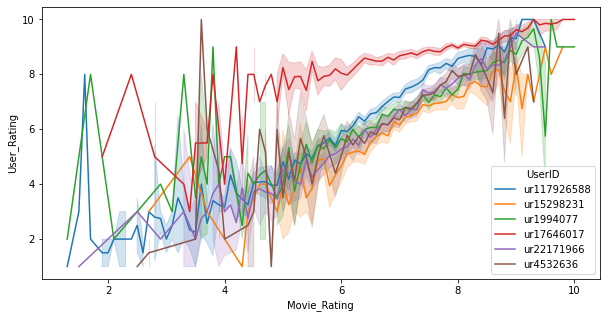

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df, y = 'User_Rating', x = 'Movie_Rating', hue = 'UserID')
plt.show()

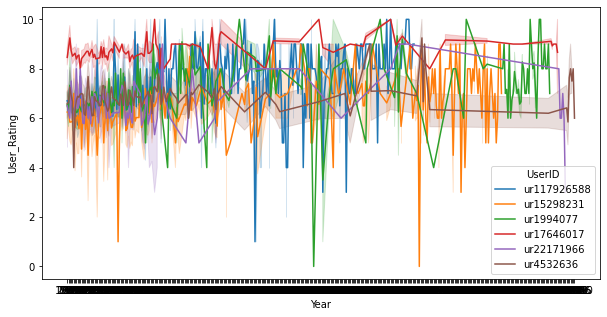

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df, x = 'Year', y = 'User_Rating', hue= 'UserID')
plt.show()

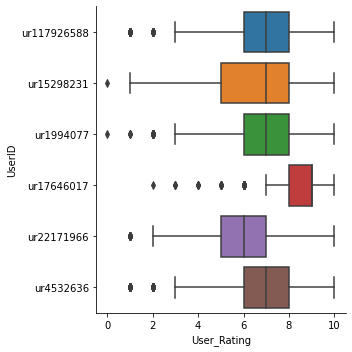

In [6]:
sns.catplot(data = df,  x = 'User_Rating' ,y= 'UserID', kind= 'box')

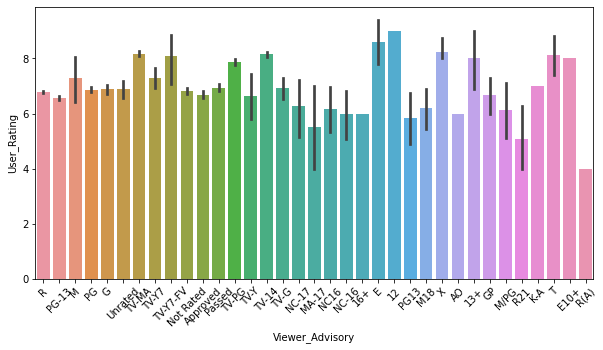

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data = df, x='Viewer_Advisory', y = 'User_Rating',ax= ax)
plt.xticks(rotation=45)
plt.show()

#### Check for nan values

In [8]:
# create boolean mask of NaN values
nan_mask = df.isna()

# count number of True values in each column
nan_count = nan_mask.sum(axis=0)

# print number of NaN values in each column
print(nan_count/len(df))

UserID             0.000000
Title              0.000000
Year               0.000000
Description        0.003783
Directors          0.048092
Stars              0.003078
Viewer_Advisory    0.023084
Duration           0.006989
Genre              0.000000
Votes              0.000128
Movie_Rating       0.000000
User_Rating        0.000000
dtype: float64


#### Get number of years from now using Year of movie 

In [9]:
df['Year'].unique()[:50]

array(['1985', '2022', '1968', '1984', '2008', '2023', '2000', '1994',
       '2003', '2005', '1953', '2001', '2015', '1991', '1997', '1995',
       '1993', '1992', '2012', '1986', '1996', '1980', '1979', '2023–',
       '2011', '1987', '1989', '1981', '1999', '1988', '1990', '1998',
       '1974', '2021', '2007', '2004', '2014–2017', '1993–1994', '2018',
       '2022–', '2006', '1950', '1963', '1982', '1948', '2013', '2016',
       '1978', '1977', '2014'], dtype=object)

In [10]:
df['num_years_released'] = df['Year'].apply(lambda x: 2023 - int(x) if len(x.split('–')) == 0 else 2023 - int(x.split('–')[0]))
df.head(5)

,UserID,Title,Year,Description,Directors,Stars,Viewer_Advisory,Duration,Genre,Votes,Movie_Rating,User_Rating,num_years_released
0,ur117926588,A Nightmare on Elm Street 2: Freddy's Revenge,1985,A teenage boy is haunted in his dreams by dece...,['Jack Sholder'],"['Robert Englund', 'Mark Patton', 'Kim Myers',...",R,1 hr 27 min,Horror,72454.0,5.4,5,38
1,ur117926588,Elvis,2022,The life of American music icon,['Baz Luhrmann'],"['Tom Hanks', 'Austin Butler', 'Olivia DeJonge...",PG-13,2 hr 39 min,"Biography, Drama, Music",196677.0,7.3,8,1
2,ur117926588,Where Eagles Dare,1968,Allied agents stage a daring raid on a castle ...,['Brian G. Hutton'],"['Richard Burton', 'Clint Eastwood', 'Mary Ure...",M,2 hr 38 min,"Action, Adventure, War",59856.0,7.6,9,55
3,ur117926588,A Nightmare on Elm Street,1984,Teenager Nancy Thompson must uncover the dark ...,['Wes Craven'],"['Heather Langenkamp', 'Johnny Depp', 'Robert ...",R,1 hr 31 min,Horror,245805.0,7.4,9,39
4,ur117926588,Eagle Eye,2008,Jerry and Rachel are two strangers thrown toge...,['D.J. Caruso'],"['Shia LaBeouf', 'Michelle Monaghan', 'Rosario...",PG-13,1 hr 58 min,"Action, Mystery, Thriller",189895.0,6.6,5,15


#### cleaned up viewer advisory

In [11]:
df['Viewer_Advisory'].unique()

array(['R', 'PG-13', 'M', 'PG', 'G', 'Unrated', 'TV-MA', 'TV-Y7',
       'TV-Y7-FV', 'Not Rated', 'Approved', 'Passed', nan, 'TV-PG',
       'TV-Y', 'TV-14', 'TV-G', 'NC-17', 'MA-17', 'NC16', 'NC-16', '16+',
       'E', '12', 'PG13', 'M18', 'X', 'AO', '13+', 'GP', 'M/PG', 'R21',
       'K-A', 'T', 'E10+', 'R(A)'], dtype=object)

In [12]:
def clean_viewer(x):
    pg = ['PG-13', 'PG','PG13']
    tv = ['TV-Y', 'TV-Y7', 'TV-Y7-FV']
    nc = ['NC-17', 'MA-17', 'NC16', 'NC-16', '17+']
    m = ['M', "M-18"]
    r =['R', 'R21']
    unrated = ['Unrated', 'Not Rated', 'Approved', 'Passed']
    
    if x in pg:
        return "PG"
    elif x in tv:
        return 'TV-Y'
    elif x in nc:
        return "NC-17"
    elif x in m:
        return "M"
    elif x in r:
        return "R21"
    elif x in unrated:
        return "Unrated"
    elif not isinstance(x,str):
        return "Unrated"
    else:
        return x
    
df['Viewer_Advisory'] = df['Viewer_Advisory'].apply(clean_viewer)

In [13]:
df['Viewer_Advisory'].unique()

array(['R21', 'PG', 'M', 'G', 'Unrated', 'TV-MA', 'TV-Y', 'TV-PG',
       'TV-14', 'TV-G', 'NC-17', '16+', 'E', '12', 'M18', 'X', 'AO',
       '13+', 'GP', 'M/PG', 'K-A', 'T', 'E10+', 'R(A)'], dtype=object)

In [14]:
df['viewer_cat'] = df['Viewer_Advisory'].astype('category').cat.codes
df.head(5)

,UserID,Title,Year,Description,Directors,Stars,Viewer_Advisory,Duration,Genre,Votes,Movie_Rating,User_Rating,num_years_released,viewer_cat
0,ur117926588,A Nightmare on Elm Street 2: Freddy's Revenge,1985,A teenage boy is haunted in his dreams by dece...,['Jack Sholder'],"['Robert Englund', 'Mark Patton', 'Kim Myers',...",R21,1 hr 27 min,Horror,72454.0,5.4,5,38,15
1,ur117926588,Elvis,2022,The life of American music icon,['Baz Luhrmann'],"['Tom Hanks', 'Austin Butler', 'Olivia DeJonge...",PG,2 hr 39 min,"Biography, Drama, Music",196677.0,7.3,8,1,13
2,ur117926588,Where Eagles Dare,1968,Allied agents stage a daring raid on a castle ...,['Brian G. Hutton'],"['Richard Burton', 'Clint Eastwood', 'Mary Ure...",M,2 hr 38 min,"Action, Adventure, War",59856.0,7.6,9,55,9
3,ur117926588,A Nightmare on Elm Street,1984,Teenager Nancy Thompson must uncover the dark ...,['Wes Craven'],"['Heather Langenkamp', 'Johnny Depp', 'Robert ...",R21,1 hr 31 min,Horror,245805.0,7.4,9,39,15
4,ur117926588,Eagle Eye,2008,Jerry and Rachel are two strangers thrown toge...,['D.J. Caruso'],"['Shia LaBeouf', 'Michelle Monaghan', 'Rosario...",PG,1 hr 58 min,"Action, Mystery, Thriller",189895.0,6.6,5,15,13


#### convert movie duration to minutes

In [15]:
def convert_to_mins(x):
    if not isinstance(x, str):
        return x
    elif len(x.split(" "))>2:
        return 60*int(x.split(" ")[0]) + int(x.split(" ")[2])
    else:
        return int(x.split(" ")[0])
                   
df['viewer_cat'] = df['Viewer_Advisory'].astype('category').cat.codes
df['duration_mins'] = df['Duration'].apply(convert_to_mins)
df.head(5)             

,UserID,Title,Year,Description,Directors,Stars,Viewer_Advisory,Duration,Genre,Votes,Movie_Rating,User_Rating,num_years_released,viewer_cat,duration_mins
0,ur117926588,A Nightmare on Elm Street 2: Freddy's Revenge,1985,A teenage boy is haunted in his dreams by dece...,['Jack Sholder'],"['Robert Englund', 'Mark Patton', 'Kim Myers',...",R21,1 hr 27 min,Horror,72454.0,5.4,5,38,15,87.0
1,ur117926588,Elvis,2022,The life of American music icon,['Baz Luhrmann'],"['Tom Hanks', 'Austin Butler', 'Olivia DeJonge...",PG,2 hr 39 min,"Biography, Drama, Music",196677.0,7.3,8,1,13,159.0
2,ur117926588,Where Eagles Dare,1968,Allied agents stage a daring raid on a castle ...,['Brian G. Hutton'],"['Richard Burton', 'Clint Eastwood', 'Mary Ure...",M,2 hr 38 min,"Action, Adventure, War",59856.0,7.6,9,55,9,158.0
3,ur117926588,A Nightmare on Elm Street,1984,Teenager Nancy Thompson must uncover the dark ...,['Wes Craven'],"['Heather Langenkamp', 'Johnny Depp', 'Robert ...",R21,1 hr 31 min,Horror,245805.0,7.4,9,39,15,91.0
4,ur117926588,Eagle Eye,2008,Jerry and Rachel are two strangers thrown toge...,['D.J. Caruso'],"['Shia LaBeouf', 'Michelle Monaghan', 'Rosario...",PG,1 hr 58 min,"Action, Mystery, Thriller",189895.0,6.6,5,15,13,118.0


#### one hot encoding genre list

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

df['genre_list'] = df['Genre'].apply(lambda x: x.strip().replace(" ",  "").split(","))
mlb = MultiLabelBinarizer()
res1 = pd.DataFrame(mlb.fit_transform(df['genre_list']),
                   columns=mlb.classes_,
                   index=df.index)
df = pd.concat([df, res1], axis = 1)

In [17]:
df.head(2)

,UserID,Title,Year,Description,Directors,Stars,Viewer_Advisory,Duration,Genre,Votes,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,ur117926588,A Nightmare on Elm Street 2: Freddy's Revenge,1985,A teenage boy is haunted in his dreams by dece...,['Jack Sholder'],"['Robert Englund', 'Mark Patton', 'Kim Myers',...",R21,1 hr 27 min,Horror,72454.0,...,0,0,0,0,0,0,0,0,0,0
1,ur117926588,Elvis,2022,The life of American music icon,['Baz Luhrmann'],"['Tom Hanks', 'Austin Butler', 'Olivia DeJonge...",PG,2 hr 39 min,"Biography, Drama, Music",196677.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_final = df.drop(columns= ['UserID', 'Title', 'Year', 'Description', 'Directors', 'Stars', 'Viewer_Advisory', 'Duration', 'Genre', 'genre_list'])

In [21]:
df_final.head(5)

,Votes,Movie_Rating,User_Rating,num_years_released,viewer_cat,duration_mins,Action,Adventure,Animation,Biography,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,72454.0,5.4,5,38,15,87.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,196677.0,7.3,8,1,13,159.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,59856.0,7.6,9,55,9,158.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,245805.0,7.4,9,39,15,91.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,189895.0,6.6,5,15,13,118.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# create boolean mask of NaN values
nan_mask = df_final.isna()

# count number of True values in each column
nan_count = nan_mask.sum(axis=0)

# print number of NaN values in each column
print(nan_count/len(df_final))

Votes                 0.000128
Movie_Rating          0.000000
User_Rating           0.000000
num_years_released    0.000000
viewer_cat            0.000000
duration_mins         0.006989
Action                0.000000
Adventure             0.000000
Animation             0.000000
Biography             0.000000
Comedy                0.000000
Crime                 0.000000
Documentary           0.000000
Drama                 0.000000
Family                0.000000
Fantasy               0.000000
Film-Noir             0.000000
Game-Show             0.000000
History               0.000000
Horror                0.000000
Music                 0.000000
Musical               0.000000
Mystery               0.000000
News                  0.000000
Reality-TV            0.000000
Romance               0.000000
Sci-Fi                0.000000
Short                 0.000000
Sport                 0.000000
Talk-Show             0.000000
Thriller              0.000000
War                   0.000000
Western 

#### Fill na values with mean

In [ ]:
df_final['Votes'] = df_final['Votes'].fillna(df_final['Votes'].mean())
df_final[''] = df_final['Votes'].fillna(df_final['Votes'].mean())

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

x = df_final.loc[:, df_final.columns != "User_Rating"].values
y = df_final.loc[:, df_final.columns == 'User_Rating'].values
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state= 123)